
# SLAP IT WITH THE SHAP

In [1]:
import os
import sys
sys.path.append(os.path.realpath(".."))
#os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
#os.environ["CUDA_VISIBLE_DEVICES"]="6"
from keras.models import Sequential
from keras.optimizers import Adam
from keras.regularizers import l1
from keras.layers import Dense, Conv2D, Flatten, Dropout
import ptetaphi_nn
import tools
with open("../filepath.txt", 'r') as f:
    filename = f.read().strip("\n")
    
s_table = tools.open_file(filename, sort_by="tag")

Using TensorFlow backend.


sorting data by tag


In [2]:
nt3 = s_table.nbtags==3  # 3 b tags
events = s_table[nt3]
#print(len(events))


cutoff = 10  # not many events have >10 jets
# "pad" = ensure all events have same length, cut off ends if needed
events = tools.pad(events, cutoff)

# then ensure require pt >= 40 and |eta| <= 2.5
#pt_filter = events.resolved_lv.pt < 40
#events.resolved_lv.pt[pt_filter] = 0
#events.resolved_lv.eta[pt_filter] = 0
#events.resolved_lv.phi[pt_filter] = 0

#eta_filter = (events.resolved_lv.eta >= -2.5) & (events.resolved_lv.eta >= 2.5)
#events.resolved_lv.pt[eta_filter] = 0
#events.resolved_lv.eta[eta_filter] = 0
#events.resolved_lv.phi[eta_filter] = 0
#print(events.resolved_lv.pt[0])
#print(events.tag[0])
print(len(events))

313660


In [3]:
import importlib
importlib.reload(ptetaphi_nn)
importlib.reload(tools)
#nn = ptetaphi_nn.PtEtaPhiNN(events, load=("models/architecture_same_filters.json", "models/weights_same_filters.h5"), njets=10)
nn = ptetaphi_nn.PtEtaPhiNN(events, load=("/home/cmccracken/start_tf/bbb/models/architecture_2b.json", "../models/weights_2b.h5"), njets=10)
nn.model.summary()

DATA FOR .csv file:
pt_mean,pt_var,eta_mean,eta_var,phi_mean,phi_var
257.9804267245531,29242.12073626681,-0.0015771052650250892,1.069004641546583,0.005263276406561931,3.2963776240355216
166.25408178248713,15319.781926360858,-0.005313892421170956,1.1547439268217867,-0.0035193140193099676,3.289345045663315
77.12934316509742,2008.8786125279557,-0.0011814623224652647,1.1893891228877966,-0.0016881561520987317,3.28996691362392
160.74513954779692,21269.163747968436,-0.003397612654562627,2.466212741216529,0.010895861923160994,3.2727168060789005
59.262299237290506,4342.003064007382,0.004766014805629303,2.7339287579319382,-0.00035625071462719386,2.5893351104665454
24.630997050727483,1124.3797378174825,0.005469604010125678,2.055168363301421,0.0020967183715553486,1.6394836907938826
10.070897567627162,379.7309155534772,0.0037123063854517103,1.168092044524338,-0.00018795374819776065,0.8474314929463835
3.785011551494631,132.0663603919536,0.001499154561558802,0.5297806920728408,0.0024408840662099563,0

100%|██████████| 62732/62732 [00:00<00:00, 102970.20it/s]


overall accuracy: 70.23 percent
ignoring 2.68762354141427 percent of 62732 events


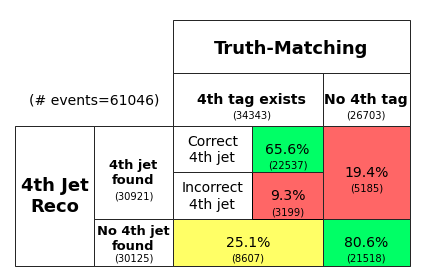

In [4]:
#import awkward
#import uproot_methods as urm
#import importlib
#importlib.reload(tools)

#one_event = awkward.Table()

#for index in range(12):
#    lv = urm.TLorentzVectorArray.from_ptetaphie(events.resolved_lv.pt[index].reshape(1, -1),
#                                                events.resolved_lv.eta[index].reshape(1, -1),
#                                                events.resolved_lv.phi[index].reshape(1, -1),
#                                                events.resolved_lv.E[index].reshape(1, -1))

#    one_event.resolved_lv = lv
#    one_event.truth = events.truth[index].reshape(1, -1)
#    one_event.tag = events.tag[index].reshape(1, -1)

#    selections = nn.evaluate(one_event, output=None)[0]
#    print(f"Event {index}")
#    print("|Tag|Truth|Sel|pt")
#    for i in range(events.njets[index]):
#        print(f"| {events.truth[index][i]} |  {events.tag[index][i]}  | {selections[i]} | {events.resolved_lv.pt[index][i]:.3f}")
#    print()
selections = nn.evaluate()

In [5]:
import shap
X_test = nn.s_in[nn.test][:1000]
shap_values = shap.DeepExplainer(nn.model, X_test).shap_values(nn.X_train)
shap.summary_plot(shap_values, X_test, plot_type="bar")

keras is no longer supported, please use tf.keras instead.


ValueError: Layer sequential_2 was called with an input that isn't a symbolic tensor. Received type: <class 'numpy.ndarray'>. Full input: [array([[ 1.9863293e-01, -8.9935970e-01, -7.3455697e-01, ...,
        -4.0596901e-03,  1.0810787e-03,  2.8130647e-03],
       [-4.0771765e-01,  3.1960061e-01,  1.9107072e-01, ...,
        -4.0596901e-03,  1.0810787e-03,  2.8130647e-03],
       [-8.3758217e-01, -8.9935970e-01, -7.3455697e-01, ...,
        -4.0596901e-03,  1.0810787e-03,  2.8130647e-03],
       ...,
       [-8.6405605e-01, -3.8935134e-01,  2.6229861e-01, ...,
        -4.1726608e+00,  1.0810787e-03,  2.8130647e-03],
       [-6.7456299e-01, -4.1188288e-01, -7.3455697e-01, ...,
        -4.0596901e-03,  1.0810787e-03,  2.8130647e-03],
       [ 1.1649205e-01, -4.6134302e-01, -7.3455697e-01, ...,
        -4.0596901e-03,  1.0810787e-03,  2.8130647e-03]], dtype=float32)]. All inputs to the layer should be tensors.